# Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df_movie = pd.read_csv("../data/tmdb_5000_movies.csv")
df_credit = pd.read_csv("../data/tmdb_5000_credits.csv")

# helper function

In [3]:
def extract_feature(x, field='name'):
    """
    function is intended to convert string
    json and extract values of a specified field
    as a list...
    """
    x = ast.literal_eval(x)
    return [i[field] for i in x]

def find_index_val(x, idx=0):
    """
    Function would come in handy when
    I am trying to find primary genre for example..
    """
    return x[idx] if len(x) > 0 else np.NAN

def cal_length(x):
    return len(x)

def find_role(x, role='Director'):
    x = ast.literal_eval(x)
    for i in x:
        if i['job'] == role:
            return i['name']
    return np.NaN

def find_animation(x):
    for i in x:
        if i.lower() == 'animation':
            return 1
    return 0

def get_lengths(x):
    x = ast.literal_eval(x)
    return len(x)

# cleaning

In [4]:
# can we join the dataset eventually?... on what column(s)?
df_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


pretty clear, I'm guessing we can join id in movie df to movie_id in credit_df

## fields I'm looking to extract/engineer from movie df

- list of genres

- primary genre - I'm working with the assumption that first genre in the list is primary genre

- list of keywords

- list of production companies

- number of production companies

- list of prodction countries

- number of production countries

## fields I'm looking to extract/engineer from credit df

- number of cast memebers

- crew size

- animated_or_not

- directors

# exploring movie DF

In [6]:
df_movie['list_genres'] = df_movie['genres'].apply(extract_feature)

df_movie['list_genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: list_genres, Length: 4803, dtype: object

In [7]:
df_movie['primary_genre'] = df_movie['list_genres'].apply(find_index_val)

df_movie['list_keywords'] = df_movie['keywords'].apply(extract_feature)

df_movie['list_production_companies'] = df_movie['production_companies'].apply(extract_feature)

df_movie['num_production_companies'] = df_movie['list_production_companies'].apply(cal_length)

df_movie['list_productioin_countries'] = df_movie['production_countries'].apply(extract_feature)

df_movie['num_productioin_countries'] = df_movie['list_productioin_countries'].apply(cal_length)

df_movie['list_spoken_languages'] = df_movie['spoken_languages'].apply(extract_feature)

df_movie['num_spoken_languages'] = df_movie['list_spoken_languages'].apply(cal_length)

df_movie['animated'] = df_movie['list_genres'].apply(find_animation)

In [8]:
movie_features = ['id', 'original_title', 'budget', 'revenue', 'original_language', 'status', 
                  'release_date', 'overview', 'tagline', 'list_keywords', 'primary_genre', 'list_genres', 
                  'list_productioin_countries', 'num_production_companies', 
                  'num_productioin_countries', 'list_spoken_languages', 'num_spoken_languages', 'popularity', 
                  'vote_average', 'vote_count', 'runtime', 'animated']

In [9]:
df_movie_final = df_movie[movie_features].copy()

df_movie_final.head()

,id,original_title,budget,revenue,original_language,status,release_date,overview,tagline,list_keywords,...,list_productioin_countries,num_production_companies,num_productioin_countries,list_spoken_languages,num_spoken_languages,popularity,vote_average,vote_count,runtime,animated
0,19995,Avatar,237000000,2787965087,en,Released,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[culture clash, future, space war, space colon...",...,"[United States of America, United Kingdom]",4,2,"[English, Español]",2,150.437577,7.2,11800,162.0,0
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,en,Released,2007-05-19,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[ocean, drug abuse, exotic island, east india ...",...,[United States of America],3,1,[English],1,139.082615,6.9,4500,169.0,0
2,206647,Spectre,245000000,880674609,en,Released,2015-10-26,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"[spy, based on novel, secret agent, sequel, mi...",...,"[United Kingdom, United States of America]",3,2,"[Français, English, Español, Italiano, Deutsch]",5,107.376788,6.3,4466,148.0,0
3,49026,The Dark Knight Rises,250000000,1084939099,en,Released,2012-07-16,Following the death of District Attorney Harve...,The Legend Ends,"[dc comics, crime fighter, terrorist, secret i...",...,[United States of America],4,1,[English],1,112.312950,7.6,9106,165.0,0
4,49529,John Carter,260000000,284139100,en,Released,2012-03-07,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.","[based on novel, mars, medallion, space travel...",...,[United States of America],1,1,[English],1,43.926995,6.1,2124,132.0,0


# working on the credits DF

In [10]:
df_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
df_credit['movie_director'] = df_credit['crew'].apply(find_role, role='Director')

In [12]:
df_credit['crew_size'] = df_credit['crew'].apply(get_lengths)

In [13]:
df_credit['cast_size'] = df_credit['cast'].apply(get_lengths)

In [14]:
df_credit.columns

Index(['movie_id', 'title', 'cast', 'crew', 'movie_director', 'crew_size',
       'cast_size'],
      dtype='object')

In [15]:
credit_features = ['movie_id', 'title', 'movie_director', 'crew_size', 'cast_size']

In [16]:
df_credit_final = df_credit[credit_features].copy()

In [17]:
df_credit_final.head()

,movie_id,title,movie_director,crew_size,cast_size
0,19995,Avatar,James Cameron,153,83
1,285,Pirates of the Caribbean: At World's End,Gore Verbinski,32,34
2,206647,Spectre,Sam Mendes,155,83
3,49026,The Dark Knight Rises,Christopher Nolan,217,158
4,49529,John Carter,Andrew Stanton,132,27


In [18]:
df_movie_credit = pd.merge(df_movie_final, df_credit_final, left_on='id', right_on='movie_id')

In [19]:
df_movie_credit.isna().sum()

id                              0
original_title                  0
budget                          0
revenue                         0
original_language               0
status                          0
release_date                    1
overview                        3
tagline                       844
list_keywords                   0
primary_genre                  28
list_genres                     0
list_productioin_countries      0
num_production_companies        0
num_productioin_countries       0
list_spoken_languages           0
num_spoken_languages            0
popularity                      0
vote_average                    0
vote_count                      0
runtime                         2
animated                        0
movie_id                        0
title                           0
movie_director                 30
crew_size                       0
cast_size                       0
dtype: int64

In [20]:
df_movie_credit['tagline'] = df_movie_credit['tagline'].fillna(' ')

df_movie_credit['overview'] = df_movie_credit['overview'].fillna(' ')
df_movie_credit['movie_director'] = df_movie_credit['movie_director'].fillna(' ')

df_movie_credit['runtime'] = df_movie_credit['runtime'].fillna(0)

In [21]:
df_movie_credit['release_date'] = pd.to_datetime(df_movie['release_date'])

df_movie_credit['year'] = df_movie_credit['release_date'].dt.year

df_movie_credit.year = df_movie_credit.year.fillna(0).astype(int)

In [22]:
#df_movie_credit.to_csv('Data/cleaned_movie_credit_merged.csv', index=False)

# Visualization Task

## Inspiration

1. Can you categorize the films by type, such as animated or not? We don't have explicit labels for this, but it should be possible to build them from the crew's job titles.

2. How sharp is the divide between major film studios and the independents? Do those two groups fall naturally out of a clustering analysis or is something more complicated going on?


## thoughts

- is the movie type same as it's genre?

- how does a crew's Job title inform that a movie was animated or not?

- how can we identify a major film studio?

- they want us to do a clustering analysis and see what movie falls into what place...how do we go about this?

# Ideas to try out 

- stacked bar charts to show top 5 genres and their revenues thingy

- we can try to see wordcloud for action movies keywords, same for drama, comedy and horror

- correlation beteen budget and crew size, budget and cast size, budget and length of the movies

- what's the average length of movies in popular genres

- rolling mean for average length of movies over the last 10 years?

- average revenue made by top 5 categories/genres every year

- word cloud of production companies in action, drama, comedy and horror

- boxplots to show budget related ishh

- violin plots cos i think that they're cool

- avearge rating trends for top 5 genres over the years...have they changed?

- how much has animation movies cost?

- profit and loss over the years across different genres with stacked bar charts?

- 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style="tableau-colorblind10")
%matplotlib inline

In [24]:
df = pd.read_csv('../data/cleaned_movie_credit_merged.csv')

In [25]:
df.head().T

,0,1,2,3,4
id,19995,285,206647,49026,49529
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
budget,237000000,300000000,245000000,250000000,260000000
revenue,2787965087,961000000,880674609,1084939099,284139100
original_language,en,en,en,en,en
status,Released,Released,Released,Released,Released
release_date,2009-12-10,2007-05-19,2015-10-26,2012-07-16,2012-03-07
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
tagline,Enter the World of Pandora.,"At the end of the world, the adventure begins.",A Plan No One Escapes,The Legend Ends,"Lost in our world, found in another."
list_keywords,"['culture clash', 'future', 'space war', 'spac...","['ocean', 'drug abuse', 'exotic island', 'east...","['spy', 'based on novel', 'secret agent', 'seq...","['dc comics', 'crime fighter', 'terrorist', 's...","['based on novel', 'mars', 'medallion', 'space..."


In [26]:
df.dtypes

id                              int64
original_title                 object
budget                          int64
revenue                         int64
original_language              object
status                         object
release_date                   object
overview                       object
tagline                        object
list_keywords                  object
primary_genre                  object
list_genres                    object
list_productioin_countries     object
num_production_companies        int64
num_productioin_countries       int64
list_spoken_languages          object
num_spoken_languages            int64
popularity                    float64
vote_average                  float64
vote_count                      int64
runtime                       float64
animated                        int64
movie_id                        int64
title                          object
movie_director                 object
crew_size                       int64
cast_size   

In [27]:
info_df = df[['original_title', 'year', 'budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime', 'crew_size', 'cast_size']].copy()

In [28]:
info_df.head()

,original_title,year,budget,revenue,popularity,vote_average,vote_count,runtime,crew_size,cast_size
0,Avatar,2009,237000000,2787965087,150.437577,7.2,11800,162.0,153,83
1,Pirates of the Caribbean: At World's End,2007,300000000,961000000,139.082615,6.9,4500,169.0,32,34
2,Spectre,2015,245000000,880674609,107.376788,6.3,4466,148.0,155,83
3,The Dark Knight Rises,2012,250000000,1084939099,112.312950,7.6,9106,165.0,217,158
4,John Carter,2012,260000000,284139100,43.926995,6.1,2124,132.0,132,27


In [29]:
len(np.sort(np.unique(df.year.values)))

91

# yearly total revenue from year 2000 to 2017

In [30]:
total_rev = df[df.year >= 2000].groupby('year', as_index=False)['revenue'].sum()
total_rev.head()

,year,revenue
0,2000,10952218337
1,2001,13269869789
2,2002,14609857556
3,2003,14213319458
4,2004,16278686567


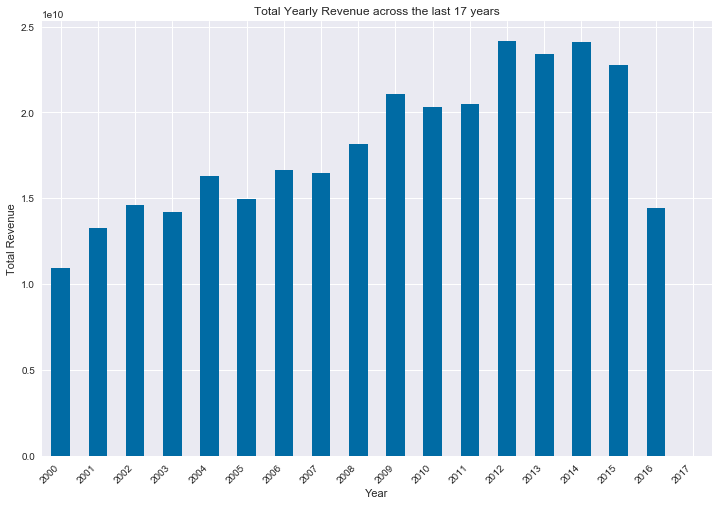

In [31]:
plt.figure(figsize=(12,8))
chart = df[df.year >= 2000].groupby('year')['revenue'].sum().plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Total Revenue')
chart.set_xlabel('Year')
chart.set_title('Total Yearly Revenue across the last 17 years');

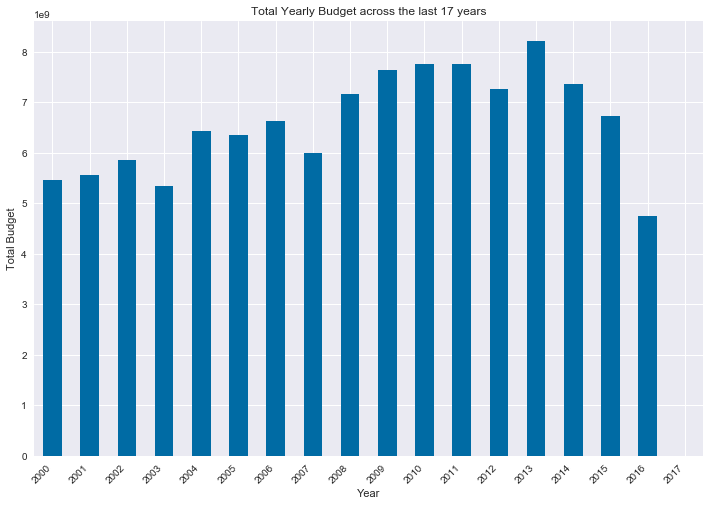

In [32]:
plt.figure(figsize=(12,8))
chart = df[df.year >= 2000].groupby('year')['budget'].sum().plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Total Budget')
chart.set_xlabel('Year')
chart.set_title('Total Yearly Budget across the last 17 years');

# Most frequently occuring genres in dataset

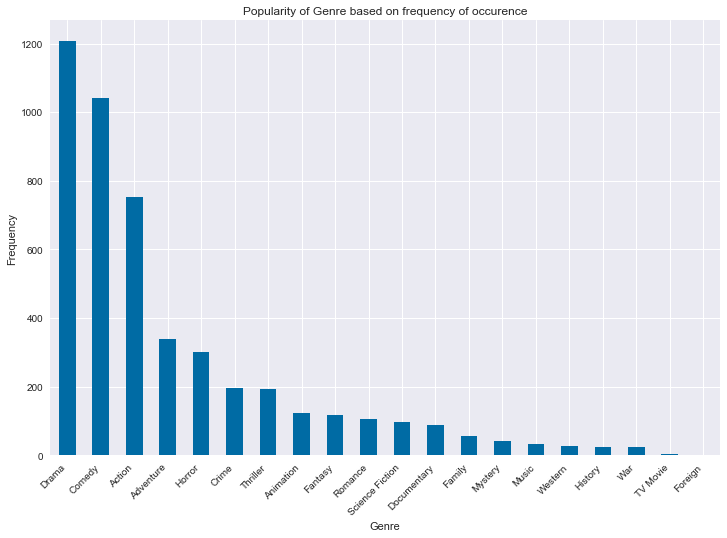

In [33]:
plt.figure(figsize=(12,8))
chart = df['primary_genre'].value_counts().plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Frequency')
chart.set_xlabel('Genre')
chart.set_title('Popularity of Genre based on frequency of occurence');

Clearly, the top 5 most frequently occuring genres in the dataset are:

- Drama

- Comedy

- Action

- Adventure 

- Horror

In [34]:
df.primary_genre.value_counts()[0:5]

Drama        1207
Comedy       1042
Action        754
Adventure     339
Horror        300
Name: primary_genre, dtype: int64

# Top 5 Movies with Greatest Profit and Loss Margins

In [35]:
df['Profits'] = df['revenue'] - df['budget']

In [36]:
profit_loss = df[['original_title', 'year', 'Profits', 'budget', 'revenue', 'popularity']]

In [37]:
profits = profit_loss.sort_values(by='Profits', ascending=False)[0:5]

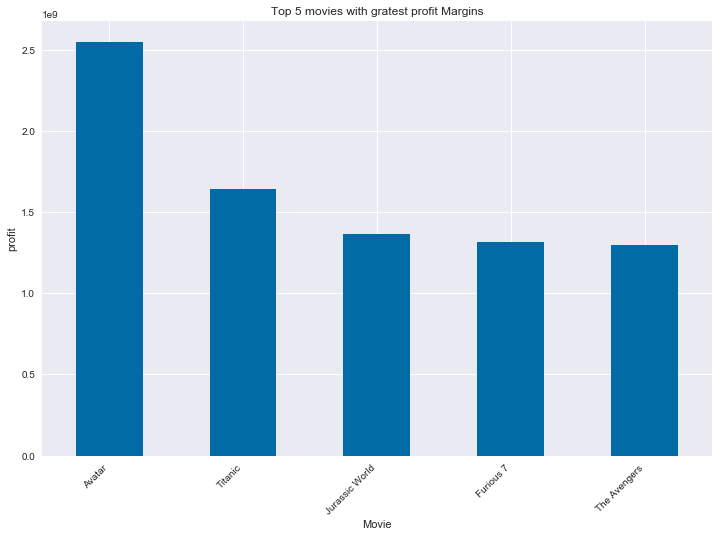

In [38]:
plt.figure(figsize=(12,8))
profits.index = profits.original_title.values
chart = profits['Profits'].plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('profit')
chart.set_xlabel('Movie')
chart.set_title('Top 5 movies with gratest profit Margins');

In [39]:
loss = profit_loss.sort_values(by='Profits')[0:5]

In [40]:
loss

,original_title,year,Profits,budget,revenue,popularity
13,The Lone Ranger,2013,-165710090,255000000,89289910,49.046956
135,The Wolfman,2010,-150000000,150000000,0,21.214571
338,The Alamo,2004,-119180039,145000000,25819961,10.660441
141,Mars Needs Moms,2011,-111007242,150000000,38992758,12.362599
1652,Dragonball Evolution,2009,-100000000,100000000,0,21.677732


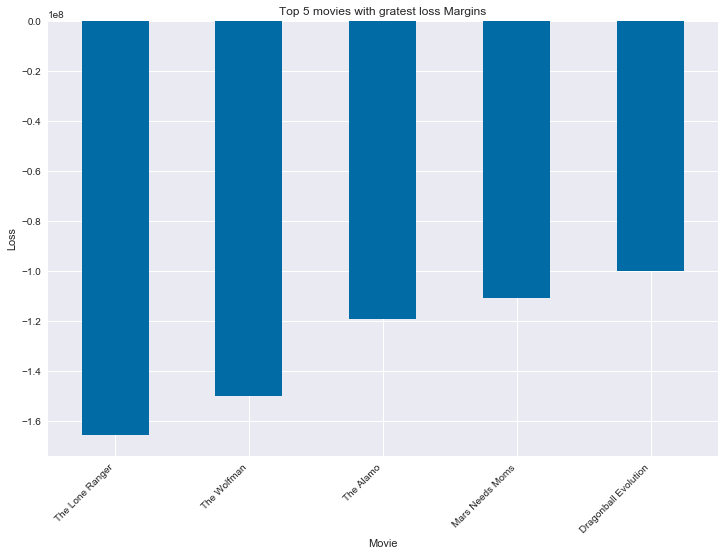

In [41]:
plt.figure(figsize=(12,8))
loss.index = loss.original_title.values
chart = loss['Profits'].plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Loss')
chart.set_xlabel('Movie')
chart.set_title('Top 5 movies with gratest loss Margins');

# Top 5 most Popular and Least Popular Movies

In [42]:
popular = df.sort_values(by='popularity')

In [43]:
top_5_least_popular = popular[:5]
top_5_most_popular = popular[-6:]

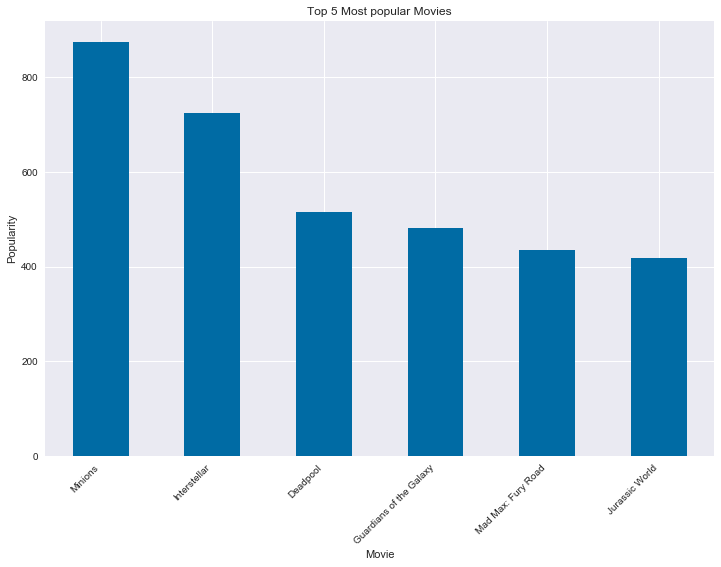

In [44]:
plt.figure(figsize=(12,8))
top_5_most_popular.index = top_5_most_popular.original_title.values
chart = top_5_most_popular['popularity'].sort_values(ascending=False).plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Popularity')
chart.set_xlabel('Movie')
chart.set_title('Top 5 Most popular Movies');

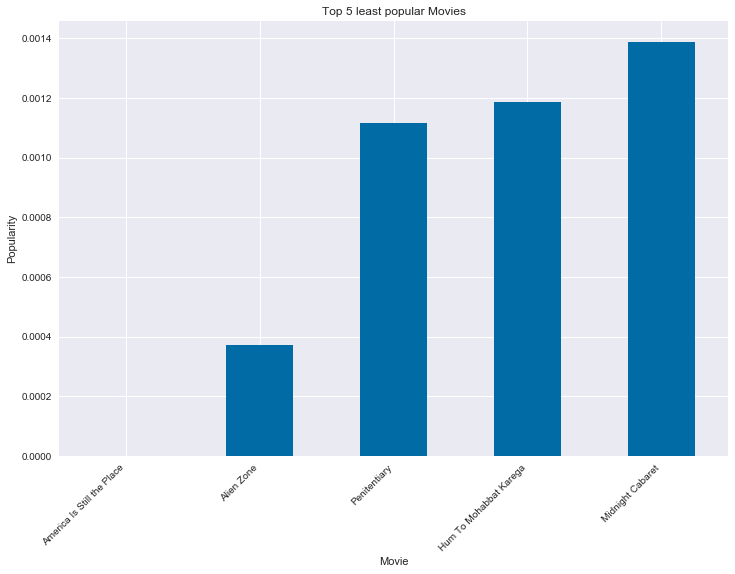

In [45]:
plt.figure(figsize=(12,8))
top_5_least_popular.index = top_5_least_popular.original_title.values
chart = top_5_least_popular['popularity'].plot.bar()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Popularity')
chart.set_xlabel('Movie')
chart.set_title('Top 5 least popular Movies');

In [46]:
len(np.unique(df.original_title.values))

4801

In [47]:
df.shape[0]

4803

In [48]:
df.original_title.duplicated().sum()

2

# Exploring genres

# what are the top 5 most popular genres?

we will find this by exloring the average popularity of movies in the genres...

In [49]:
popular_genre = df.groupby('primary_genre', as_index=False)['popularity'].mean()[:5].sort_values(by='popularity', ascending=False)

In [50]:
popular_genre.reset_index(drop=True)

,primary_genre,popularity
0,Adventure,39.057579
1,Animation,35.359647
2,Action,28.483161
3,Crime,19.873730
4,Comedy,14.844446


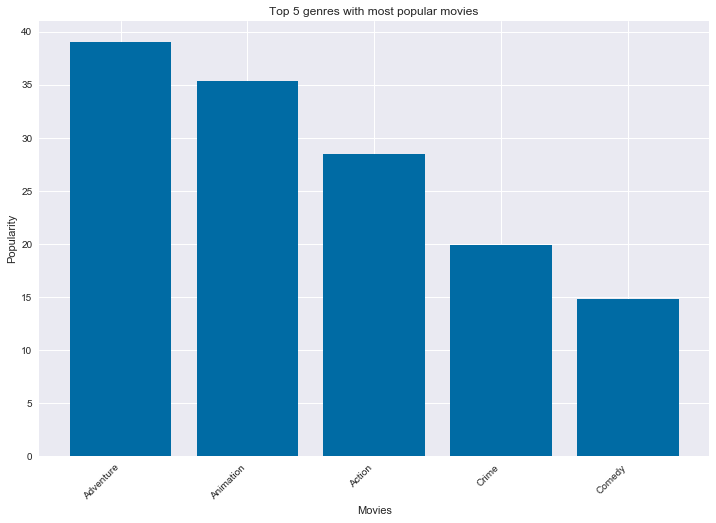

In [51]:
plt.figure(figsize=(12,8))
plt.bar(data=popular_genre, x='primary_genre', height='popularity')
plt.xlabel('Movies')
plt.ylabel('Popularity')
plt.title('Top 5 genres with most popular movies')
plt.xticks(rotation=45, horizontalalignment='right');

## What's the average budget across top 5 most popular genres?

In [52]:
top_5_genre = df[(df['primary_genre'] == 'Animation') | (df['primary_genre'] =='Adventure') | (df['primary_genre'] =='Action') | (df['primary_genre'] =='Crime') | (df['primary_genre'] =='Comedy')]

In [53]:
top_5_budget = top_5_genre.groupby('primary_genre', as_index=False)['budget'].mean().sort_values(by='budget', ascending=False)
top_5_budget

,primary_genre,budget
2,Animation,6.760189e+07
1,Adventure,6.559832e+07
0,Action,4.765133e+07
4,Crime,2.163398e+07
3,Comedy,1.883704e+07


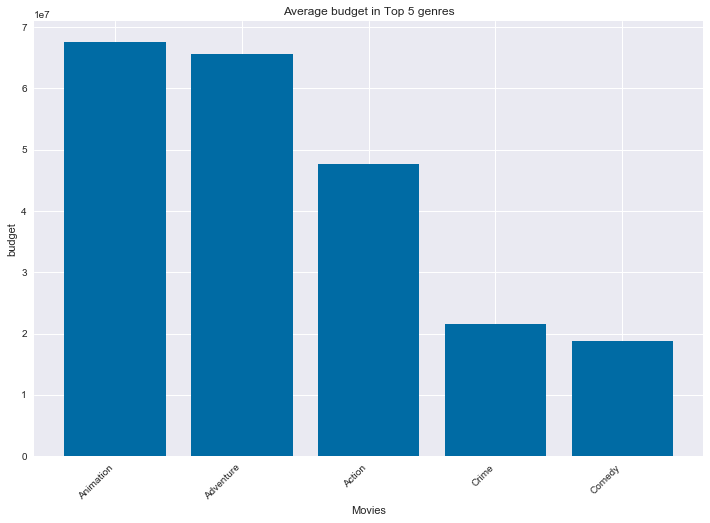

In [54]:
plt.figure(figsize=(12,8))
plt.bar(data=top_5_budget, x='primary_genre', height='budget')
plt.xlabel('Movies')
plt.ylabel('budget')
plt.title('Average budget in Top 5 genres')
plt.xticks(rotation=45, horizontalalignment='right');

## Whats the average revenue generated in top 5 most popular genres?

In [55]:
top_5_revenue = top_5_genre.groupby('primary_genre', as_index=False)['revenue'].mean().sort_values(by='revenue', ascending=False)
top_5_revenue

,primary_genre,revenue
2,Animation,2.417656e+08
1,Adventure,2.109611e+08
0,Action,1.218614e+08
3,Comedy,5.178074e+07
4,Crime,4.832888e+07


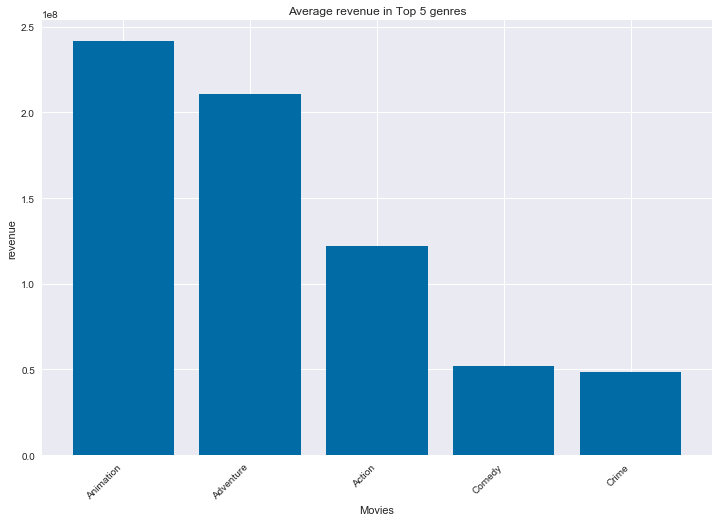

In [56]:
plt.figure(figsize=(12,8))
plt.bar(data=top_5_revenue, x='primary_genre', height='revenue')
plt.xlabel('Movies')
plt.ylabel('revenue')
plt.title('Average revenue in Top 5 genres')
plt.xticks(rotation=45, horizontalalignment='right');

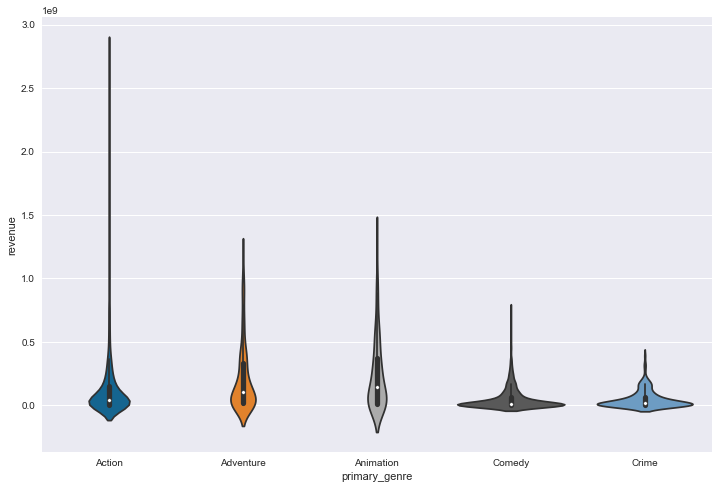

In [57]:
plt.figure(figsize=(12,8))
sns.violinplot(data=top_5_genre, y='revenue', x='primary_genre')

## whats the average runtime across top 5 most popular genres?

In [58]:
top_5_runtime = top_5_genre.groupby('primary_genre', as_index=False)['runtime'].mean().sort_values(by='runtime', ascending=False)
top_5_runtime

,primary_genre,runtime
1,Adventure,113.061947
4,Crime,112.143590
0,Action,109.058355
3,Comedy,100.464491
2,Animation,89.552846


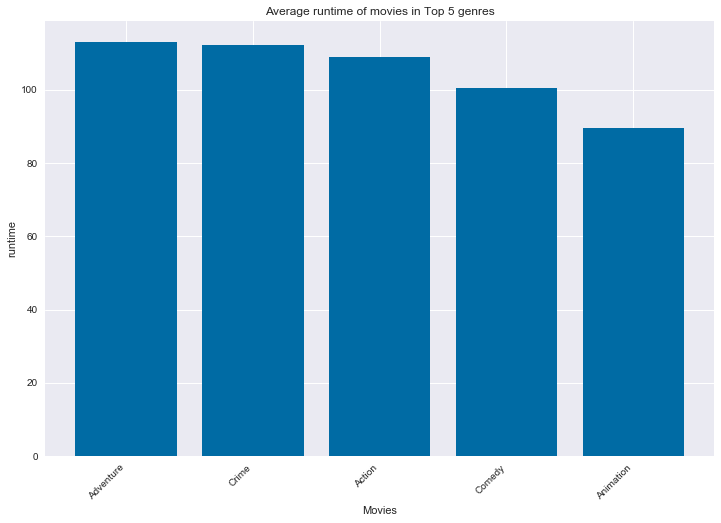

In [59]:
plt.figure(figsize=(12,8))
plt.bar(data=top_5_runtime, x='primary_genre', height='runtime')
plt.xlabel('Movies')
plt.ylabel('runtime')
plt.title('Average runtime of movies in Top 5 genres')
plt.xticks(rotation=45, horizontalalignment='right');

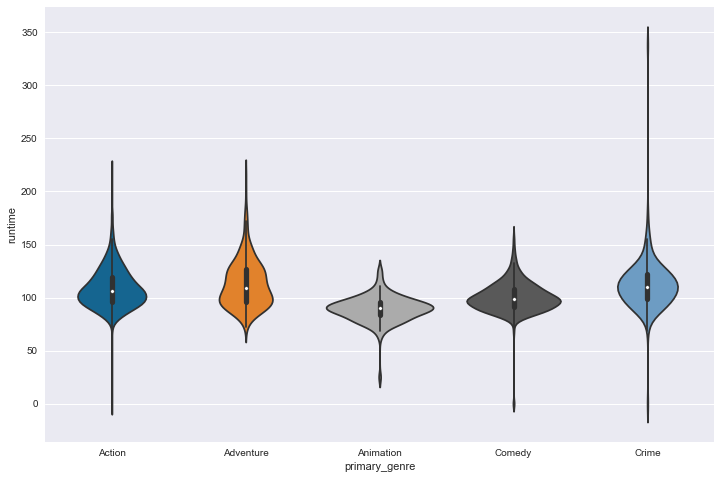

In [60]:
plt.figure(figsize=(12,8))
sns.violinplot(data=top_5_genre, y='runtime', x='primary_genre')

# Numerical plots

## is there a correlation between popularity and revenue?

Text(0.5,1,'Correlation between popularity and revenue')

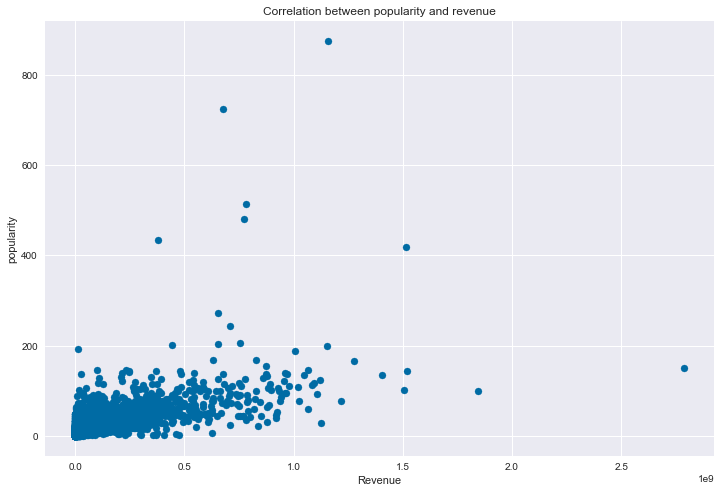

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(data=df, x='revenue', y='popularity')
plt.xlabel('Revenue')
plt.ylabel('popularity')
plt.title('Correlation between popularity and revenue')

## is there a correlation between budget and revenue?

Text(0.5,1,'Correlation between budget and revenue')

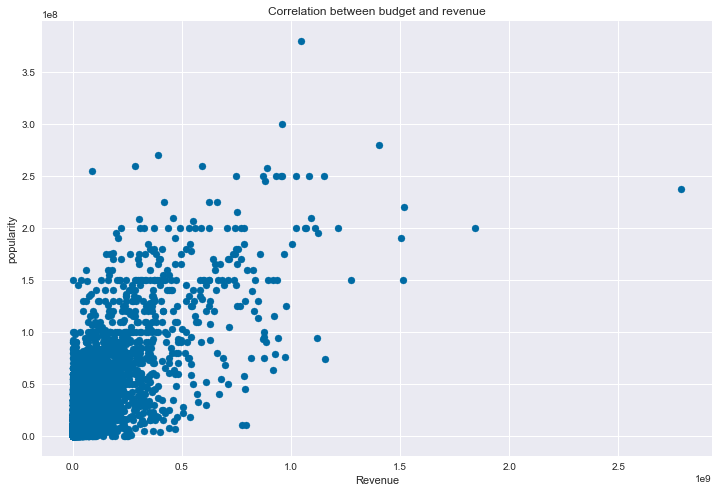

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(data=df, x='revenue', y='budget')
plt.xlabel('Revenue')
plt.ylabel('popularity')
plt.title('Correlation between budget and revenue')

## is there correlation between average ratings and revenue?

Text(0.5,1,'Correlation between Average rating and revenue')

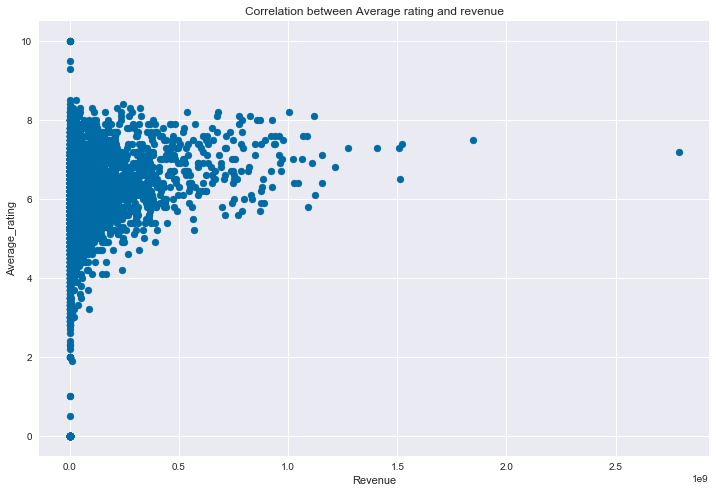

In [63]:
plt.figure(figsize=(12,8))
plt.scatter(data=df, x='revenue', y='vote_average')
plt.xlabel('Revenue')
plt.ylabel('Average_rating')
plt.title('Correlation between Average rating and revenue')

# Word Cloud Analysis

Let's visualize keyword and tagline patterns in our top 5 genres...

In [64]:
from wordcloud import WordCloud

## keywords

In [65]:
top_5_genre.head()

,id,original_title,budget,revenue,original_language,status,release_date,overview,tagline,list_keywords,...,vote_count,runtime,animated,movie_id,title,movie_director,crew_size,cast_size,year,Profits
0,19995,Avatar,237000000,2787965087,en,Released,2009-12-10,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"['culture clash', 'future', 'space war', 'spac...",...,11800,162.0,0,19995,Avatar,James Cameron,153,83,2009,2550965087
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,en,Released,2007-05-19,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","['ocean', 'drug abuse', 'exotic island', 'east...",...,4500,169.0,0,285,Pirates of the Caribbean: At World's End,Gore Verbinski,32,34,2007,661000000
2,206647,Spectre,245000000,880674609,en,Released,2015-10-26,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"['spy', 'based on novel', 'secret agent', 'seq...",...,4466,148.0,0,206647,Spectre,Sam Mendes,155,83,2015,635674609
3,49026,The Dark Knight Rises,250000000,1084939099,en,Released,2012-07-16,Following the death of District Attorney Harve...,The Legend Ends,"['dc comics', 'crime fighter', 'terrorist', 's...",...,9106,165.0,0,49026,The Dark Knight Rises,Christopher Nolan,217,158,2012,834939099
4,49529,John Carter,260000000,284139100,en,Released,2012-03-07,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.","['based on novel', 'mars', 'medallion', 'space...",...,2124,132.0,0,49529,John Carter,Andrew Stanton,132,27,2012,24139100


In [66]:
top_5_genre.primary_genre.unique()

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime'],
      dtype=object)

In [67]:
Action_df = top_5_genre[top_5_genre.primary_genre=='Action']
Adventure_df = top_5_genre[top_5_genre.primary_genre=='Adventure']
Animation_df = top_5_genre[top_5_genre.primary_genre=='Animation']
Comedy_df = top_5_genre[top_5_genre.primary_genre=='Comedy']
Crime_df = top_5_genre[top_5_genre.primary_genre=='Crime']

In [68]:
action_keywords = Action_df.list_keywords.values.tolist()
adventure_keywords = Adventure_df.list_keywords.values.tolist()
animation_keywords = Animation_df.list_keywords.values.tolist()
comedy_keywords = Comedy_df.list_keywords.values.tolist()
crime_keywords = Crime_df.list_keywords.values.tolist()

In [69]:
action_keywords = [ast.literal_eval(i) for i in action_keywords]
adventure_keywords = [ast.literal_eval(i) for i in adventure_keywords]
animation_keywords = [ast.literal_eval(i) for i in animation_keywords]
crime_keywords = [ast.literal_eval(i) for i in crime_keywords]
comedy_keywords = [ast.literal_eval(i) for i in comedy_keywords]

In [70]:
action_keywords = [x for i in action_keywords for x in i]
adventure_keywords = [x for i in adventure_keywords for x in i]
animation_keywords = [x for i in animation_keywords for x in i]
crime_keywords = [x for i in crime_keywords for x in i]
comedy_keywords = [x for i in comedy_keywords for x in i]

In [71]:
action_wordcloud = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(action_keywords)
)

In [72]:
adventure_wordcloud = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(adventure_keywords)
)

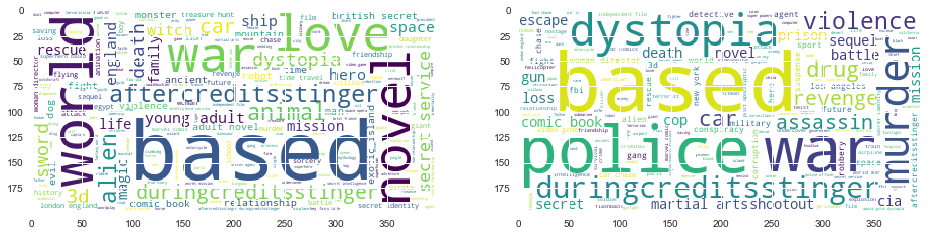

In [73]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(adventure_wordcloud)
plt.subplot(1, 2, 2)
plt.imshow(action_wordcloud)

In [74]:
crime_wordcloud = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(crime_keywords)
)

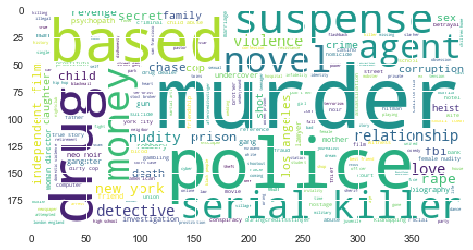

In [75]:
plt.figure(figsize=(8, 4))
plt.imshow(crime_wordcloud)

In [76]:
animation_wordcloud = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(animation_keywords)
)

comedy_wordcloud = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(comedy_keywords)
)

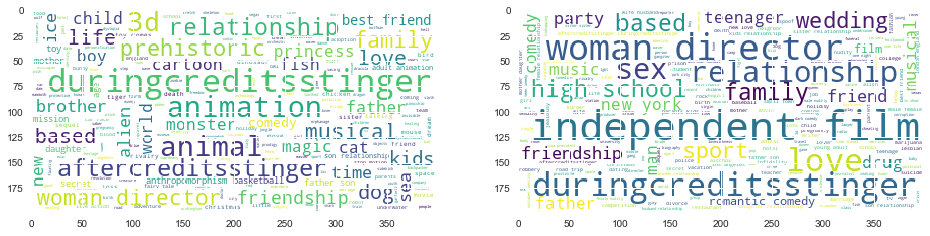

In [77]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(animation_wordcloud)
plt.subplot(1, 2, 2)
plt.imshow(comedy_wordcloud)

yet to explore taglines and relationships between budget, number of production companies, number of countries in which film was shot, crew size and cast size to see if there are trends there...